# House Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train=pd.read_csv("train.csv")

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train.isnull().sum().head()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
dtype: int64

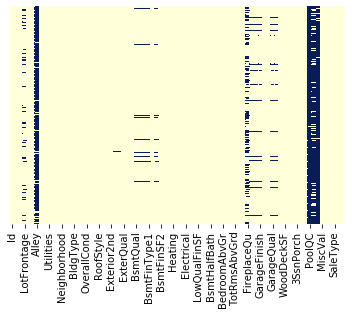

In [6]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap="YlGnBu")

In [7]:
df_train.shape

(1460, 81)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df_train.groupby("MSZoning")["LotFrontage"].mean()

MSZoning
C (all)    69.700000
FV         59.491228
RH         58.923077
RL         74.680043
RM         52.366834
Name: LotFrontage, dtype: float64

In [10]:
df_train.groupby("MSZoning")["LotFrontage"].median()

MSZoning
C (all)    60.0
FV         65.0
RH         60.0
RL         72.0
RM         51.0
Name: LotFrontage, dtype: float64

In [11]:
df_train["LotFrontage"].median()

69.0

In [12]:
def impute_lotfrontage(cols):
    ms=cols[0]
    lot=cols[1]
    if pd.isnull(lot):
        if ms=="C":
            return 60
        elif ms=="FV":
            return 65
        elif ms=="RH":
            return 60
        elif ms=="RL":
            return 72
        elif ms=="RM":
            return 51
        else:
            return 72
    else:
        return lot

        

In [13]:
df_train["LotFrontage"]=df_train[["MSZoning","LotFrontage"]].apply(impute_lotfrontage,axis=1)

In [14]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
df_train=df_train.drop(["Alley"],axis=1)

In [16]:
df_train=df_train.drop(["Fence","MiscFeature","PoolQC"],axis=1)

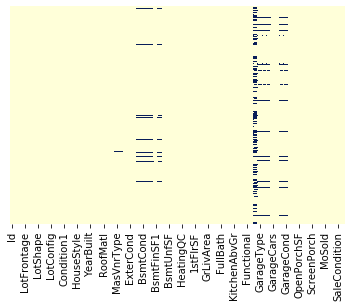

In [17]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap="YlGnBu")

In [18]:
#Checking the percentage of NAN Values
feature_NAN=[features for features in df_train.columns if df_train[features].isnull().sum()>0]
for feature in feature_NAN:
    print (feature,np.round(df_train[feature].isnull().sum(),3),"mean of each NAN feature")

MasVnrType 8 mean of each NAN feature
MasVnrArea 8 mean of each NAN feature
BsmtQual 37 mean of each NAN feature
BsmtCond 37 mean of each NAN feature
BsmtExposure 38 mean of each NAN feature
BsmtFinType1 37 mean of each NAN feature
BsmtFinType2 38 mean of each NAN feature
Electrical 1 mean of each NAN feature
FireplaceQu 690 mean of each NAN feature
GarageType 81 mean of each NAN feature
GarageYrBlt 81 mean of each NAN feature
GarageFinish 81 mean of each NAN feature
GarageQual 81 mean of each NAN feature
GarageCond 81 mean of each NAN feature


In [19]:
#Checking the categorical Features:
Catg_features=[features for features in df_train.columns if  df_train[features].dtypes=="O"]
len(Catg_features)

39

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [21]:
(df_train.groupby("MSZoning")["MasVnrType"]).count()

MSZoning
C (all)      10
FV           62
RH           16
RL         1146
RM          218
Name: MasVnrType, dtype: int64

In [22]:
(df_train.groupby("MSZoning")["MasVnrArea"]).mean()

MSZoning
C (all)      0.000000
FV         140.806452
RH          57.812500
RL         112.260908
RM          56.169725
Name: MasVnrArea, dtype: float64

In [23]:
(df_train.groupby("MasVnrType")["MasVnrArea"]).median()

MasVnrType
BrkCmn     192.0
BrkFace    202.0
None         0.0
Stone      206.5
Name: MasVnrArea, dtype: float64

In [24]:
df_train["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [25]:
df_train["MasVnrArea"].value_counts

<bound method IndexOpsMixin.value_counts of 0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64>

In [26]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

NameError: name 'df' is not defined

In [27]:
df_train["MasVnrType"]=df_train["MasVnrType"].fillna(df_train["MasVnrType"].mode()[0])

In [28]:
def impute_MasVnrArea(cols):
    mvt=cols[0]
    mva=cols[1]
    if pd.isnull(mva):
        if mvt=="BrkCmn":
            return 192
        elif mvt=="BrkFace":
            return 202
        elif mvt=="None":
            return 0
        elif mvt=="Stone":
            return 206.5
        else:
            return (192+202+0+206.5)/4
    else:
        return mva
    

In [29]:
df_train["MasVnrArea"]=df_train[["MasVnrType","MasVnrArea"]].apply(impute_MasVnrArea,axis=1)

In [30]:
df_train["Electrical"]=df_train["Electrical"].fillna(df_train["Electrical"].mode()[0])

In [31]:
df_train["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [32]:
df_train["BsmtExposure"].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [33]:
df_train["BsmtQual"]=df_train["BsmtQual"].fillna(df_train["BsmtQual"].mode()[0])
df_train["BsmtCond"]=df_train["BsmtCond"].fillna(df_train["BsmtCond"].mode()[0])
df_train["BsmtExposure"]=df_train["BsmtExposure"].fillna(df_train["BsmtExposure"].mode()[0])
df_train["BsmtFinType1"]=df_train["BsmtFinType1"].fillna(df_train["BsmtFinType1"].mode()[0])
df_train["BsmtFinType2"]=df_train["BsmtFinType2"].fillna(df_train["BsmtFinType2"].mode()[0])



In [34]:
#Checking the percentage of NAN Values
feature_NAN=[features for features in df_train.columns if df_train[features].isnull().sum()>0]
for feature in feature_NAN:
    print (feature,np.round(df_train[feature].isnull().sum(),3),"mean of each NAN feature")

FireplaceQu 690 mean of each NAN feature
GarageType 81 mean of each NAN feature
GarageYrBlt 81 mean of each NAN feature
GarageFinish 81 mean of each NAN feature
GarageQual 81 mean of each NAN feature
GarageCond 81 mean of each NAN feature


In [35]:
df_train["GarageType"]=df_train["GarageType"].fillna(df_train["GarageType"].mode()[0])
df_train["GarageFinish"]=df_train["GarageFinish"].fillna(df_train["GarageFinish"].mode()[0])
df_train["GarageType"]=df_train["GarageType"].fillna(df_train["GarageType"].mode()[0])
df_train["GarageQual"]=df_train["GarageQual"].fillna(df_train["GarageQual"].mode()[0])
df_train["GarageCond"]=df_train["GarageCond"].fillna(df_train["GarageCond"].mode()[0])

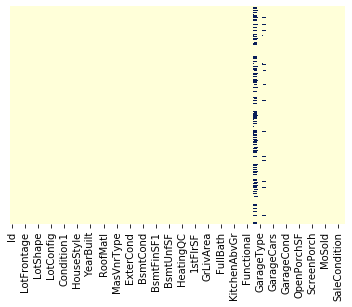

In [36]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap="YlGnBu")

In [37]:
df_train.groupby("GarageType")["GarageYrBlt"].median()

GarageType
2Types     1969.0
Attchd     1990.0
Basment    1958.0
BuiltIn    2003.0
CarPort    1963.0
Detchd     1965.0
Name: GarageYrBlt, dtype: float64

In [38]:
df_train["GarageYrBlt"]=df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].median())

In [39]:
df_train["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [40]:
df_train=df_train.drop(["FireplaceQu"],axis=1)
df_train=df_train.drop(["Id"],axis=1)

In [41]:
df_train.shape

(1460, 75)

In [219]:
# handling the test data 

In [42]:
df_test=pd.read_csv("test.csv")

In [43]:
df_test.shape

(1459, 80)

In [44]:
df_test.isnull().sum().head(50)

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
Alley           1352
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

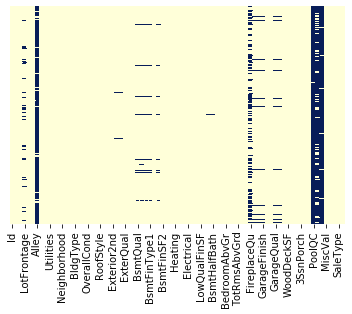

In [45]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap="YlGnBu")

In [46]:
feature_NAN=[features for features in df_test.columns if df_test[features].isnull().sum()>0]
for feature in feature_NAN:
    print(feature,np.round(df_test[feature].isnull().sum(),3),"mean of null values")

MSZoning 4 mean of null values
LotFrontage 227 mean of null values
Alley 1352 mean of null values
Utilities 2 mean of null values
Exterior1st 1 mean of null values
Exterior2nd 1 mean of null values
MasVnrType 16 mean of null values
MasVnrArea 15 mean of null values
BsmtQual 44 mean of null values
BsmtCond 45 mean of null values
BsmtExposure 44 mean of null values
BsmtFinType1 42 mean of null values
BsmtFinSF1 1 mean of null values
BsmtFinType2 42 mean of null values
BsmtFinSF2 1 mean of null values
BsmtUnfSF 1 mean of null values
TotalBsmtSF 1 mean of null values
BsmtFullBath 2 mean of null values
BsmtHalfBath 2 mean of null values
KitchenQual 1 mean of null values
Functional 2 mean of null values
FireplaceQu 730 mean of null values
GarageType 76 mean of null values
GarageYrBlt 78 mean of null values
GarageFinish 78 mean of null values
GarageCars 1 mean of null values
GarageArea 1 mean of null values
GarageQual 78 mean of null values
GarageCond 78 mean of null values
PoolQC 1456 mean o

In [47]:
df_test=df_test.drop(["Alley","Id","Fence","PoolQC","MiscFeature"],axis=1)

In [48]:
df_test=df_test.drop(["FireplaceQu"],axis=1)

In [49]:
df_test["MSZoning"]=df_test["MSZoning"].fillna(df_test["MSZoning"].mode()[0])

In [50]:
df_test["Utilities"]=df_test["Utilities"].fillna(df_test["Utilities"].mode()[0])

In [51]:
df_test["Exterior1st"]=df_test["Exterior1st"].fillna(df_test["Exterior1st"].mode()[0])

In [52]:
df_test["Exterior2nd"]=df_test["Exterior2nd"].fillna(df_test["Exterior2nd"].mode()[0])

In [53]:
df_test["MasVnrType"]=df_test["MasVnrType"].fillna(df_test["MasVnrType"].mode()[0])
df_test["BsmtQual"]=df_test["BsmtQual"].fillna(df_test["BsmtQual"].mode()[0])
df_test["BsmtCond"]=df_test["BsmtCond"].fillna(df_test["BsmtCond"].mode()[0])
df_test["BsmtExposure"]=df_test["BsmtExposure"].fillna(df_test["BsmtExposure"].mode()[0])
df_test["BsmtFinType1"]=df_test["BsmtFinType1"].fillna(df_test["BsmtFinType1"].mode()[0])

In [54]:
df_test["BsmtFinSF1"]=df_test["BsmtFinSF1"].fillna(df_test["BsmtFinSF1"].mean())
df_test["BsmtFinType2"]=df_test["BsmtFinType2"].fillna(df_test["BsmtFinType2"].mode()[0])
df_test["BsmtFinSF2"]=df_test["BsmtFinSF2"].fillna(df_test["BsmtFinSF2"].mean())
df_test["BsmtUnfSF"]=df_test["BsmtUnfSF"].fillna(df_test["BsmtUnfSF"].mean())
df_test["TotalBsmtSF"]=df_test["TotalBsmtSF"].fillna(df_test["TotalBsmtSF"].mean())

In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [56]:
df_test["BsmtFullBath"]=df_test["BsmtFullBath"].fillna(df_test["BsmtFullBath"].mean())
df_test["BsmtHalfBath"]=df_test["BsmtHalfBath"].fillna(df_test["BsmtHalfBath"].mean())

In [57]:
df_test["KitchenQual"]=df_test["KitchenQual"].fillna(df_test["KitchenQual"].mode()[0])
df_test["Functional"]=df_test["Functional"].fillna(df_test["Functional"].mode()[0])
df_test["GarageType"]=df_test["GarageType"].fillna(df_test["GarageType"].mode()[0])
df_test["GarageFinish"]=df_test["GarageFinish"].fillna(df_test["GarageFinish"].mode()[0])

In [58]:
df_test["GarageCars"]=df_test["GarageCars"].fillna(df_test["GarageCars"].mean())
df_test["GarageArea"]=df_test["GarageArea"].fillna(df_test["GarageArea"].mean())
df_test["GarageQual"]=df_test["GarageQual"].fillna(df_test["GarageQual"].mode()[0])
df_test["GarageCond"]=df_test["GarageCond"].fillna(df_test["GarageCond"].mode()[0])

In [59]:
df_test["SaleType"]=df_test["SaleType"].fillna(df_test["SaleType"].mode()[0])

In [60]:
def impute_MasVnrArea(cols):
    mvt=cols[0]
    mva=cols[1]
    if pd.isnull(mva):
        if mvt=="BrkCmn":
            return 192
        elif mvt=="BrkFace":
            return 202
        elif mvt=="None":
            return 0
        elif mvt=="Stone":
            return 206.5
        else:
            return (192+202+0+206.5)/4
    else:
        return mva

In [61]:
df_test["MasVnrArea"]=df_test[["MasVnrType","MasVnrArea"]].apply(impute_MasVnrArea,axis=1)

In [62]:
df_test["LotFrontage"]=df_test[["MSZoning","LotFrontage"]].apply(impute_lotfrontage,axis=1)

In [63]:
df_test.groupby("GarageType")["GarageYrBlt"].median()

GarageType
2Types     1968.0
Attchd     1991.0
Basment    1960.0
BuiltIn    2003.0
CarPort    1962.0
Detchd     1959.0
Name: GarageYrBlt, dtype: float64

In [64]:
df_test["GarageYrBlt"].median()

1979.0

In [65]:
df_test["GarageYrBlt"]=df_test["GarageYrBlt"].fillna(df_test["GarageYrBlt"].mean())

In [132]:
df_test.shape

(1459, 74)

In [67]:
df_train.shape

(1460, 75)

In [104]:
##Combining Train Data and Test Data

In [68]:
df_combined=pd.concat([df_train,df_test],axis=0)

In [69]:
df_combined.shape

(2919, 75)

In [70]:
df_combined["MSZoning"]

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1454    RM
1455    RM
1456    RL
1457    RL
1458    RL
Name: MSZoning, Length: 2919, dtype: object

In [71]:
df_combined.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 75, dtype: int64

In [ ]:
##Perform onehot encoding on the categorical Variable

In [72]:
catg=[features for features in df_combined.columns if df_combined[features].dtypes=="O"]

In [73]:
for feature in catg:
    print("feature is {} and no of categories is {}".format(feature,len(df_combined[feature].unique())))

feature is MSZoning and no of categories is 5
feature is Street and no of categories is 2
feature is LotShape and no of categories is 4
feature is LandContour and no of categories is 4
feature is Utilities and no of categories is 2
feature is LotConfig and no of categories is 5
feature is LandSlope and no of categories is 3
feature is Neighborhood and no of categories is 25
feature is Condition1 and no of categories is 9
feature is Condition2 and no of categories is 8
feature is BldgType and no of categories is 5
feature is HouseStyle and no of categories is 8
feature is RoofStyle and no of categories is 6
feature is RoofMatl and no of categories is 8
feature is Exterior1st and no of categories is 15
feature is Exterior2nd and no of categories is 16
feature is MasVnrType and no of categories is 4
feature is ExterQual and no of categories is 4
feature is ExterCond and no of categories is 5
feature is Foundation and no of categories is 6
feature is BsmtQual and no of categories is 4
feat

In [74]:
for feature in catg:
    print(df_combined[feature].value_counts())

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
Pave    2907
Grvl      12
Name: Street, dtype: int64
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64
Norm      2511
Feedr      164
Artery 

In [75]:
def onehot_encoding_catg_multi(mulcols):
    
    i=0
    for colm in mulcols:
        
        encoded_table=pd.get_dummies(df_combined[colm],drop_first=True)
        
        df_combined.drop([colm],axis=1,inplace=True)
        if i==0:
            df_final=encoded_table.copy()
        else:
            df_final=pd.concat([df_final,encoded_table],axis=1)
        i=i+1
    
    df_final=pd.concat([df_combined,df_final],axis=1)
    return df_final


In [76]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']


In [77]:
len(columns)

38

In [78]:
df_final=onehot_encoding_catg_multi(columns)

In [79]:
df_final.shape

(2919, 233)

In [192]:
df_final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,1,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,1,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,0,0,0,1,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,1,0,1


In [193]:
df_overall=df_final.loc[:,~df_final.columns.duplicated()]

In [194]:
df_overall

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,1,0,0,0,1,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,1,1,0,0,0,0,0,0


In [137]:
df_test.shape

(1459, 74)

In [148]:
df_train.shape

(1460, 75)

In [140]:
df_overall.shape

(2919, 177)

In [195]:
df_final_train=df_overall.iloc[:1460,:]

In [196]:
df_final_train.shape

(1460, 177)

In [197]:
df_final_test=df_overall.iloc[1460:,:]

In [198]:
df_final_test.shape

(1459, 177)

In [199]:
df_final_test.drop(["SalePrice"],axis=1,inplace=True)

C:\Users\shree\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [200]:
df_final_test.shape

(1459, 176)

In [201]:
X_test=df_final_test

In [158]:
X_test.shape

(1459, 176)

In [159]:
df_final_train.shape

(1460, 177)

In [202]:
y_train=df_final_train["SalePrice"]

In [166]:
y_train.shape

(1460,)

In [203]:
df_final_train.drop(["SalePrice"],axis=1,inplace=True)

In [204]:
X_train=df_final_train

In [205]:
X_train.shape

(1460, 176)

In [92]:
#Applying the Algorithm

In [ ]:
#Applying Linear Regression

In [164]:
from sklearn.linear_model import LinearRegression

In [167]:
regressor=LinearRegression()

In [168]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [169]:
y_pred=regressor.predict(X_test)

In [174]:
#Creating the submission file
linear_pred=pd.DataFrame(y_pred)
df_ssub=pd.read_csv("sample_submission.csv")
Submission=pd.concat([df_ssub["Id"],linear_pred],axis=1)
Submission.columns=["Id","SalePrice"]
Submission.to_csv("Linear_regression.csv",index=False)

In [ ]:
#Appling Polynomial Regression

In [175]:
from sklearn.preprocessing import PolynomialFeatures

In [176]:
poly_reg=PolynomialFeatures()

In [180]:
X_poly=poly_reg.fit_transform(X_train)

In [181]:
poly_reg.fit(X_poly,y_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [183]:
lin_reg=LinearRegression()

In [184]:
lin_reg.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [185]:
X_test_poly=poly_reg.fit_transform(X_test)

In [187]:
y_poly_pred=lin_reg.predict(X_test_poly)

In [188]:
#Creating the submission file
linear_pred=pd.DataFrame(y_poly_pred)
df_ssub=pd.read_csv("sample_submission.csv")
Submission=pd.concat([df_ssub["Id"],linear_pred],axis=1)
Submission.columns=["Id","SalePrice"]
Submission.to_csv("Polynomial_regression.csv",index=False)

In [189]:
#Appling the Decision Tree Algorithm

In [206]:
from sklearn.tree import DecisionTreeRegressor

In [207]:
dec_reg=DecisionTreeRegressor()

In [209]:
dec_reg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [211]:
y_dec_pred=dec_reg.predict(X_test)

In [212]:
#Creating the submission file
decision_pred=pd.DataFrame(y_dec_pred)
df_ssub=pd.read_csv("sample_submission.csv")
Submission=pd.concat([df_ssub["Id"],linear_pred],axis=1)
Submission.columns=["Id","SalePrice"]
Submission.to_csv("Decision_tree_regression.csv",index=False)

In [218]:
#Using Random Forest

In [213]:
from sklearn.ensemble import RandomForestRegressor

In [215]:
rand_reg = RandomForestRegressor(n_estimators=100, random_state=0)

In [217]:
rand_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [221]:
y_rand_pred=rand_reg.predict(X_test)

In [222]:
random_pred=pd.DataFrame(y_rand_pred)
df_ssub=pd.read_csv("sample_submission.csv")
Submission=pd.concat([df_ssub["Id"],linear_pred],axis=1)
Submission.columns=["Id","SalePrice"]
Submission.to_csv("Random_forest_regression.csv",index=False)